In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA 
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from scipy import stats
import plotly.express as px

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('leaf.csv',
                names = ['Class','Specimen Number','Eccentricity','Aspect Ratio','Elongation','Solidity','Stochastic Convexity',
                        'Isoperimetric Factor','Maximal Indentation Depth','Lobedness','Average Intensity','Average Contrast',
                        'Smoothness','Third moment','Uniformity','Entropy'])


In [5]:
df.head()

Class  Specimen Number  Eccentricity  Aspect Ratio  Elongation  Solidity  \
0      1                1       0.72694        1.4742     0.32396   0.98535   
1      1                2       0.74173        1.5257     0.36116   0.98152   
2      1                3       0.76722        1.5725     0.38998   0.97755   
3      1                4       0.73797        1.4597     0.35376   0.97566   
4      1                5       0.82301        1.7707     0.44462   0.97698   

   Stochastic Convexity  Isoperimetric Factor  Maximal Indentation Depth  \
0               1.00000               0.83592                   0.004657   
1               0.99825               0.79867                   0.005242   
2               1.00000               0.80812                   0.007457   
3               1.00000               0.81697                   0.006877   
4               1.00000               0.75493                   0.007428   

   Lobedness  Average Intensity  Average Contrast  Smoothness  Third moment  \
0   0.003947           0.047790          0.127950    0.016108      0.005232   
1   0.005002           0.024160          0.090476    0.008119      0.002708   
2   0.010121           0.011897          0.057445    0.003289      0.000921   
3   0.008607           0.015950          0.065491    0.004271      0.001154   
4   0.010042           0.007938          0.045339    0.002051      0.000560   

   Uniformity  Entropy  
0    0.000275  1.17560  
1    0.000075  0.69659  
2    0.000038  0.44348  
3    0.000066  0.58785  
4    0.000024  0.34214

In [6]:
df.isnull().any()

Class                        False
Specimen Number              False
Eccentricity                 False
Aspect Ratio                 False
Elongation                   False
Solidity                     False
Stochastic Convexity         False
Isoperimetric Factor         False
Maximal Indentation Depth    False
Lobedness                    False
Average Intensity            False
Average Contrast             False
Smoothness                   False
Third moment                 False
Uniformity                   False
Entropy                      False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Class                      340 non-null    int64  
 1   Specimen Number            340 non-null    int64  
 2   Eccentricity               340 non-null    float64
 3   Aspect Ratio               340 non-null    float64
 4   Elongation                 340 non-null    float64
 5   Solidity                   340 non-null    float64
 6   Stochastic Convexity       340 non-null    float64
 7   Isoperimetric Factor       340 non-null    float64
 8   Maximal Indentation Depth  340 non-null    float64
 9   Lobedness                  340 non-null    float64
 10  Average Intensity          340 non-null    float64
 11  Average Contrast           340 non-null    float64
 12  Smoothness                 340 non-null    float64
 13  Third moment               340 non-null    float64

#### This Dataset has 340 entries with 0 missing values 

#### Description of Variables 

Let I denote an object of interest in a binary ∂I its border, D(I) it's diameter, i.e.,
the maximum distance between any two points in ∂I and A(I) its area. Let A(H(I)) denote the area of the object’s convex hull (i.e. any ’optimal’ inscribing convex polygon) and L(∂I) the object’s contour length. Assume that the operator d(.) stands for the Euclidean distance. Table 2 details the definition of attributes 3 to 10.


Eccentricity: Eccentricity of the ellipse with identical second moments to I. This value ranges from 0 to 1.

Aspect Ratio: Consider any X,Y ∈ ∂I. Choose X and Y such that d(X,Y)=D(I). FindZ,W ∈∂I maximizingD⊥ =d(Z,W) on the set of all pairs of ∂I that define a segment orthogonal to [XY]. The aspect ratio is defined as the quotient D(I)/D⊥. Values close to 0 indicate an elongated shape.

Elongation: Compute the maximum escape distance dmax = maxX∈I d(X, ∂I). Elongation is obtained as 1 − 2dmax/D(I) and ranges from 0 to 1. The minimum is achieved for a circular region. Note that the ratio 2dmax/D(I) is the quotient between the diameter of the largest inscribed circle and the diameter of the smallest circumscribed circle.

Solidity: The ratio A(I)/A(H(I)) is computed, which can be under- stood as a certain measure of convexity. It measures how well I fits a convex shape.

Stochastic Convexity: This variable extends the usual notion of convexity in topological sense, using sampling to perform the calculation. The aim is to estimate the probability of a random segment [XY ], X, Y ∈ I, to be fully contained in I.

Isoperimetric Factor: The ratio 4πA(I)/L(∂I)2 is calculated. The maximum value of 1 is reached for a circular region. Curvy intertwined con- tours yield low values.

Maximal Indentation Depth: Let CH(I) and L(H(I)) denote the centroid and arclength of H(I). The distances d(X, CH(I)) and d(Y, CH(I)) are com- puted ∀X ∈ H(I) and ∀Y ∈ ∂I. The indentation function can then be defined as [d(X, CH(I)) − d(Y, CH(I))]/L(H(I)), which is sampled at one degree intervals. The maximal in- dentation depth D is the maximum of this function.

Lobedness: This feature characterizes how lobed a leaf is.

Average Intensity: Average intensity is defined as the mean of the intensity image, m.

Average Contrast: Average contrast is the the standard deviation of the intensity im- age, σ = sqrt(μ2(z))

Smoothness: measures the relative smoothness of the intensities in a given region. For a region of constant intensity, R takes the value 0 and R approaches 1 as regions exhibit larger disparities in intensity values. 

Third moment: is a measure of the intensity histogram’s skewness. 

Uniformity: Uniformity’s maximum value is reached when all intensity levels are equal.

Entropy: A measure of intensity randomness.

# Description of Data

In [8]:
classes = df.groupby('Class')

classes.mean()

Specimen Number  Eccentricity  Aspect Ratio  Elongation  Solidity  \
Class                                                                      
1                  6.5      0.783871      1.671917    0.405703  0.981114   
2                  5.5      0.892392      2.329780    0.569689  0.983006   
3                  5.5      0.631143      1.127110    0.348055  0.918901   
4                  4.5      0.587046      1.313075    0.282160  0.959985   
5                  6.5      0.884717      1.950225    0.641956  0.834318   
6                  4.5      0.540244      1.141687    0.635144  0.746730   
7                  5.5      0.847015      1.784710    0.523541  0.880880   
8                  6.0      0.986000      6.244855    0.841250  0.966127   
9                  7.5      0.541732      1.295814    0.362623  0.903542   
10                 7.0      0.446628      1.190085    0.315579  0.932513   
11                 8.5      0.417701      1.087387    0.661612  0.529682   
12                 6.5      0.894390      2.453800    0.606075  0.924752   
13                 7.0      0.686850      1.445338    0.322292  0.985790   
14                 6.5      0.907250      2.426000    0.600080  0.967752   
15                 5.5      0.478145      1.110330    0.502293  0.755965   
22                 6.5      0.908170      2.609333    0.615996  0.913315   
23                 6.0      0.592664      1.194109    0.405735  0.921218   
24                 7.0      0.523858      1.321338    0.266052  0.970007   
25                 5.0      0.781174      1.563500    0.446092  0.931643   
26                 6.5      0.581925      1.363433    0.272832  0.979145   
27                 6.0      0.754888      1.553145    0.370865  0.985855   
28                 6.5      0.910536      2.687408    0.626894  0.972337   
29                 6.5      0.818954      1.917533    0.477162  0.956480   
30                 6.5      0.413823      1.165050    0.258229  0.940906   
31                 6.0      0.995840     10.258173    0.922679  0.806231   
32                 6.0      0.864303      2.084791    0.521577  0.984647   
33                 6.0      0.716454      1.548700    0.361625  0.980116   
34                 6.0      0.996274     12.253391    0.916300  0.904014   
35                 6.0      0.913175      2.636555    0.624915  0.976306   
36                 5.5      0.414255      1.101770    0.780244  0.690399   

       Stochastic Convexity  Isoperimetric Factor  Maximal Indentation Depth  \
Class                                                                          
1                  0.999270              0.789273                   0.006284   
2                  0.999825              0.657457                   0.006135   
3                  0.995265              0.648439                   0.025205   
4                  0.995176              0.733518                   0.011820   
5                  0.871637              0.345574                   0.049470   
6                  0.644080              0.262884                   0.119345   
7                  0.980528              0.525058                   0.026969   
8                  0.981977              0.297050                   0.023175   
9                  0.986843              0.551034                   0.029952   
10                 0.976382              0.600242                   0.048080   
11                 0.652521              0.158526                   0.128979   
12                 0.987137              0.480651                   0.038127   
13                 0.999461              0.809349                   0.005449   
14                 0.996347              0.573726                   0.009751   
15                 0.880352              0.291471                   0.077557   
22                 0.977484              0.491200                   0.054324   
23                 0.908293              0.528898                   0.060579   
24                 0.996493              0.769605     

#### Observations from means: There are Classes with very high and distinct Aspect Ratios such as Class 8, Class 31 and Class 34.

# Data Visualization

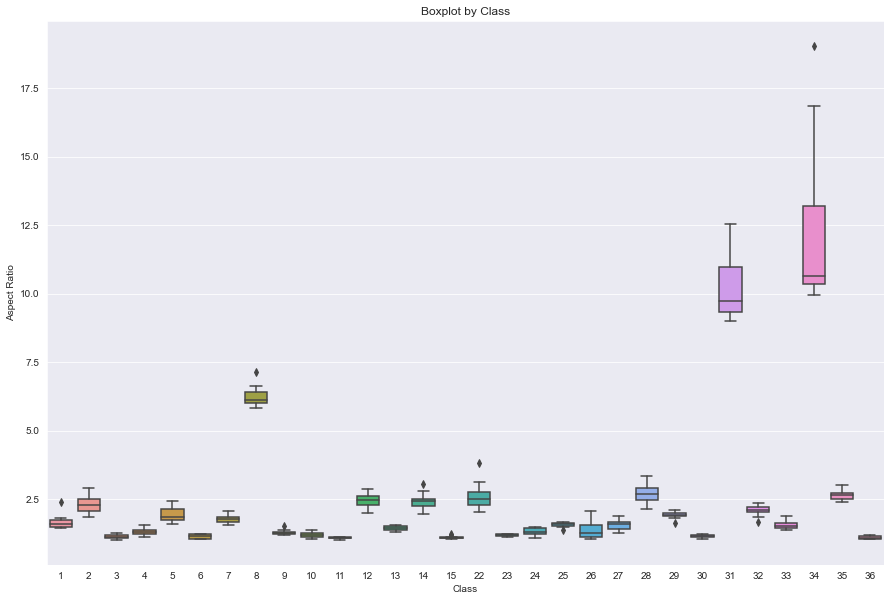

In [9]:
# BOXPLOT
plt.figure(figsize=(15,10))
sns.boxplot(data=df, y="Aspect Ratio", x="Class")
plt.title('Boxplot by Class')
plt.show()

#### Here we can see again, that classes: 8, 31 and 34 are distinct. In addition, there are some outliers for classes: 1, 8, 9, 14, 15, 22, 25, 29, 32 and 34

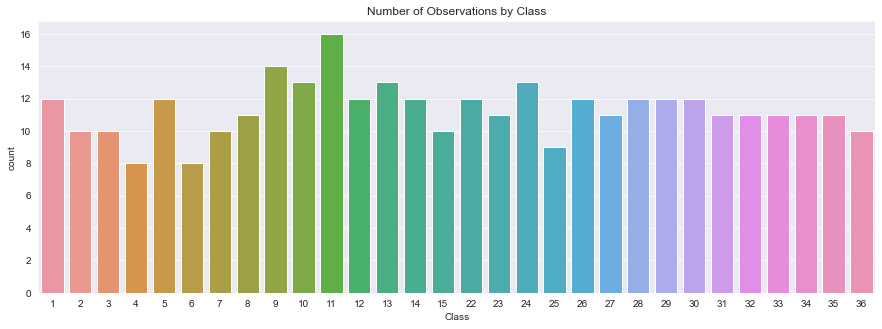

In [10]:
sns.countplot(data = df, x = 'Class')
plt.title('Number of Observations by Class')
plt.show()

#### Here we can see that most classes have similar amounts observations. 

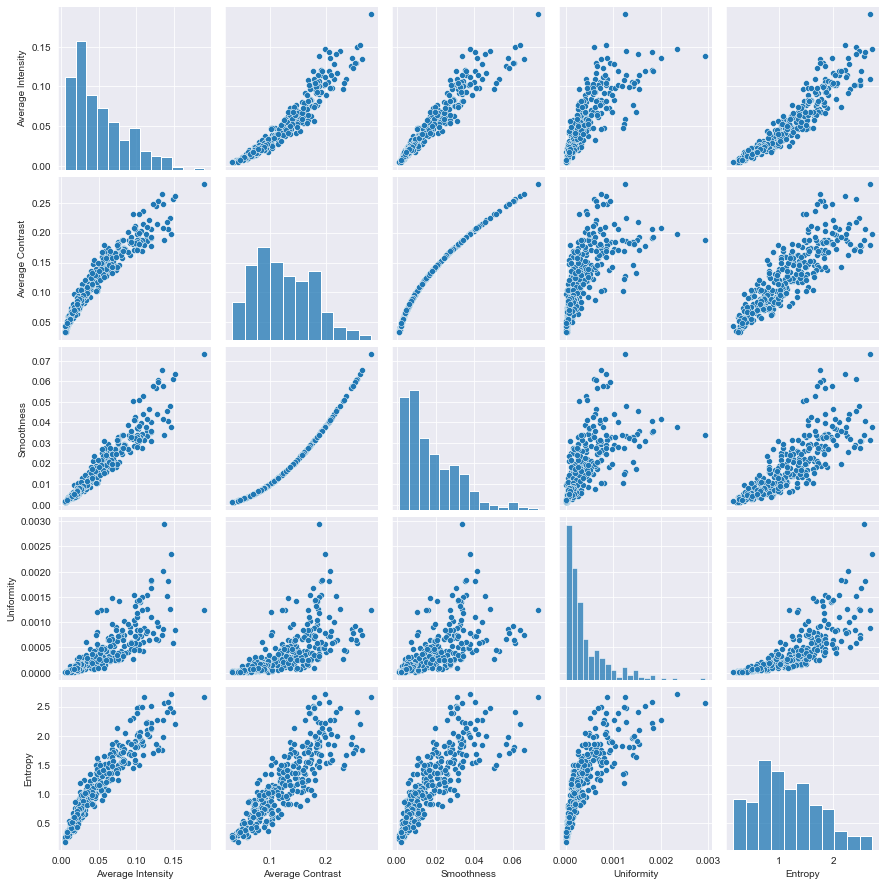

In [11]:
rcParams['figure.figsize'] = 15, 5
X = df[['Average Intensity','Average Contrast','Smoothness','Uniformity','Entropy']]
sns.pairplot(X)
plt.show()

### Heavy amounts of linear correlation 

Average Intensity is extremely correlated to Smoothness, Average Contrast and Entropy 

Average Contrast is extremely correlated to Entropy, Third Moment, Smoothness and Average Intensity. 

Smoothness is extremely correlated to Entropy, Third Moment, Average Contrast and Average Intensity.


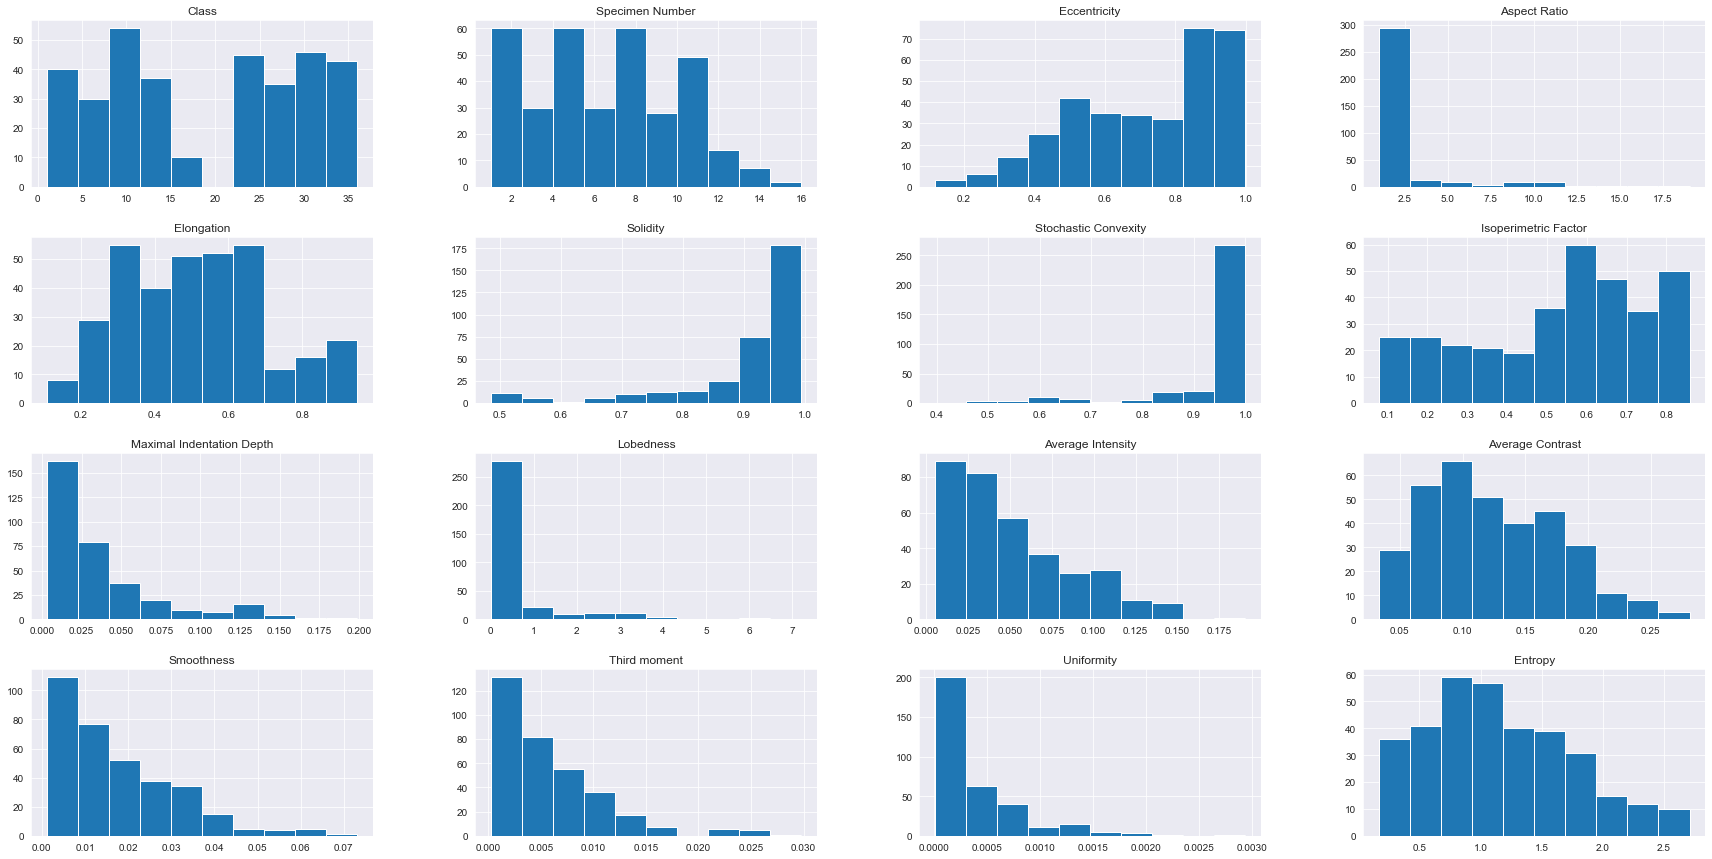

In [12]:
df.hist(figsize=(30,15))
plt.show()

#### Aspect Ratio, Lobedness and Convexity have very skewed data, which means that some of those outliers could be classes that can be distinguished.

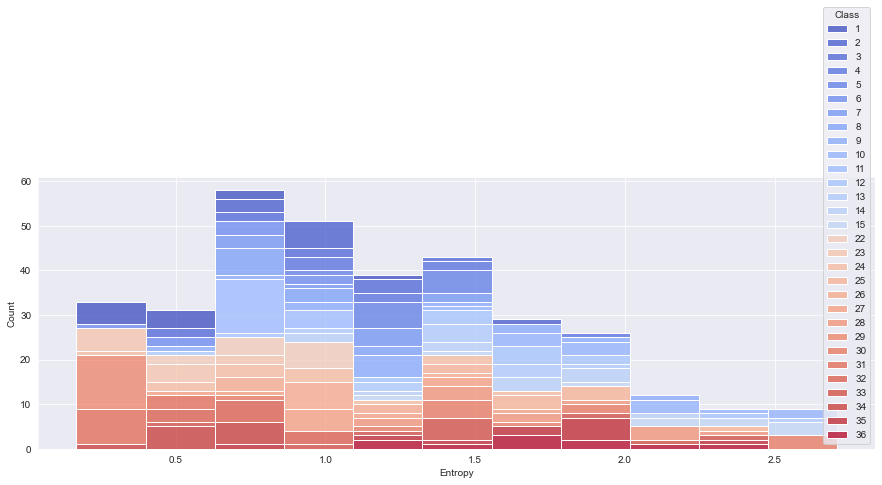

In [13]:
sns.histplot(data = df, x = 'Entropy', hue = 'Class', multiple= 'stack',
            palette=sns.color_palette('coolwarm', as_cmap = True))
plt.show()

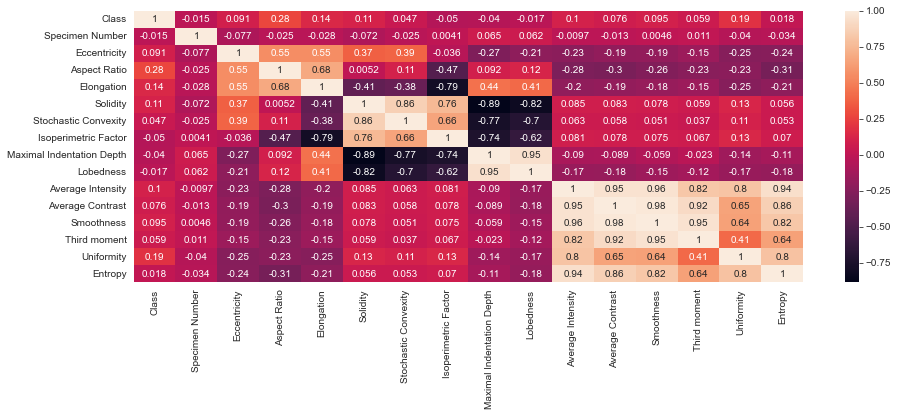

In [14]:
# Some variables are highly correlated

sns.heatmap(df.corr(),annot=True)
plt.show()

## Preprocessing

In [15]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [16]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)
X_df = pd.DataFrame(X_scaled,columns = x.columns)
X_df

Specimen Number  Eccentricity  Aspect Ratio  Elongation  Solidity  \
0          -1.527715      0.034066     -0.372227   -0.971865  0.709286   
1          -1.238504      0.105170     -0.352383   -0.781384  0.675827   
2          -0.949293      0.227715     -0.334350   -0.633812  0.641146   
3          -0.660082      0.087093     -0.377814   -0.819275  0.624635   
4          -0.370871      0.495931     -0.257978   -0.354030  0.636167   
..               ...           ...           ...         ...       ...   
335        -0.081660     -1.656859     -0.500347    1.554005 -1.913575   
336         0.207551     -2.111561     -0.522234    1.225989 -1.595501   
337         0.496762     -1.761569     -0.542270    1.370795 -1.719114   
338         0.785973     -0.576786     -0.499962    1.032077 -2.124110   
339         1.075185     -1.191821     -0.520230    1.742643 -3.216357   

     Stochastic Convexity  Isoperimetric Factor  Maximal Indentation Depth  \
0                0.489279              1.402718                  -0.848639   
1                0.474045              1.231226                  -0.833433   
2                0.489279              1.274732                  -0.775928   
3                0.489279              1.315476                  -0.790999   
4                0.489279              1.029856                  -0.776688   
..                    ...                   ...                        ...   
335             -3.099596             -1.869163                   1.415317   
336             -1.999987             -1.815621                   1.081345   
337             -2.855248             -1.824046                   1.360875   
338             -4.076987             -1.720736                   1.973755   
339             -4.764242             -2.084870                   2.464433   

     Lobedness  Average Intensity  Average Contrast  Smoothness  Third moment  \
0    -0.500813          -0.099030          0.065951   -0.113724     -0.131550   
1    -0.499796          -0.757027         -0.657718   -0.695349     -0.609065   
2    -0.494865          -1.098501         -1.295588   -1.047039     -0.947167   
3    -0.496324          -0.985642         -1.140210   -0.975571     -0.902955   
4    -0.494941          -1.208746         -1.529370   -1.137153     -1.015422   
..         ...                ...               ...         ...           ...   
335   0.974806           1.769149          1.623596    1.749790      1.402917   
336   0.589490           2.502609          1.810722    2.025367      1.149055   
337   0.907953           1.289727          1.593085    1.705960      1.928612   
338   1.748905          -0.026658          0.218510    0.032838      0.049615   
339   2.562500           0.853772          1.222116    1.194340      1.429968   

     Uniformity   Entropy  
0     -0.261030  0.022209  
1     -0.725100 -0.798023  
2     -0.810893 -1.231436  
3     -0.745003 -0.984224  
4     -0.844277 -1.404965  
..          ...       ...  
335    1.005343  1.481987  
336    2.618764  2.128913  
337    0.152405  0.909035  
338   -0.284776 -0.017175  
339   -0.136194  0.684375  

[340 rows x 15 columns]

In [17]:
X_df['Class'] = y
X_df

Specimen Number  Eccentricity  Aspect Ratio  Elongation  Solidity  \
0          -1.527715      0.034066     -0.372227   -0.971865  0.709286   
1          -1.238504      0.105170     -0.352383   -0.781384  0.675827   
2          -0.949293      0.227715     -0.334350   -0.633812  0.641146   
3          -0.660082      0.087093     -0.377814   -0.819275  0.624635   
4          -0.370871      0.495931     -0.257978   -0.354030  0.636167   
..               ...           ...           ...         ...       ...   
335        -0.081660     -1.656859     -0.500347    1.554005 -1.913575   
336         0.207551     -2.111561     -0.522234    1.225989 -1.595501   
337         0.496762     -1.761569     -0.542270    1.370795 -1.719114   
338         0.785973     -0.576786     -0.499962    1.032077 -2.124110   
339         1.075185     -1.191821     -0.520230    1.742643 -3.216357   

     Stochastic Convexity  Isoperimetric Factor  Maximal Indentation Depth  \
0                0.489279              1.402718                  -0.848639   
1                0.474045              1.231226                  -0.833433   
2                0.489279              1.274732                  -0.775928   
3                0.489279              1.315476                  -0.790999   
4                0.489279              1.029856                  -0.776688   
..                    ...                   ...                        ...   
335             -3.099596             -1.869163                   1.415317   
336             -1.999987             -1.815621                   1.081345   
337             -2.855248             -1.824046                   1.360875   
338             -4.076987             -1.720736                   1.973755   
339             -4.764242             -2.084870                   2.464433   

     Lobedness  Average Intensity  Average Contrast  Smoothness  Third moment  \
0    -0.500813          -0.099030          0.065951   -0.113724     -0.131550   
1    -0.499796          -0.757027         -0.657718   -0.695349     -0.609065   
2    -0.494865          -1.098501         -1.295588   -1.047039     -0.947167   
3    -0.496324          -0.985642         -1.140210   -0.975571     -0.902955   
4    -0.494941          -1.208746         -1.529370   -1.137153     -1.015422   
..         ...                ...               ...         ...           ...   
335   0.974806           1.769149          1.623596    1.749790      1.402917   
336   0.589490           2.502609          1.810722    2.025367      1.149055   
337   0.907953           1.289727          1.593085    1.705960      1.928612   
338   1.748905          -0.026658          0.218510    0.032838      0.049615   
339   2.562500           0.853772          1.222116    1.194340      1.429968   

     Uniformity   Entropy  Class  
0     -0.261030  0.022209      1  
1     -0.725100 -0.798023      1  
2     -0.810893 -1.231436      1  
3     -0.745003 -0.984224      1  
4     -0.844277 -1.404965      1  
..          ...       ...    ...  
335    1.005343  1.481987     36  
336    2.618764  2.128913     36  
337    0.152405  0.909035     36  
338   -0.284776 -0.017175     36  
339   -0.136194  0.684375     36  

[340 rows x 16 columns]

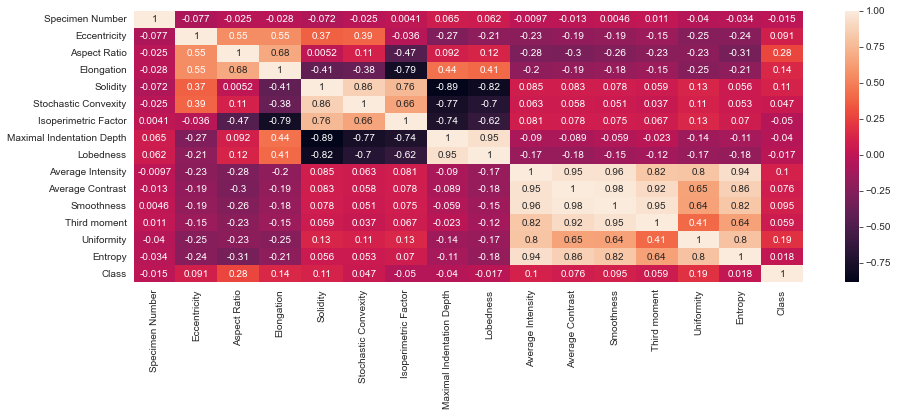

In [18]:
sns.heatmap(X_df.corr(),annot=True)
plt.show()

# SVM

The first step to build the best SVM model is to first see if SVM performs better with unscaled vs scaled data with the same parameters. In all cases I will use an 80/20 split for consistency. I will be testing out three kernels: linear, polynomial and radial.

In [19]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

## SVM with unscaled data

In [21]:
# Radial Kernel

In [22]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=1000, gamma=0.01)


In [23]:
predictions = grid.predict(X_test)
radial_unscaled_score = accuracy_score(y_test, predictions)
print(radial_unscaled_score)

0.4411764705882353


#### This is not a very good sign with a correct classification of leaves being just 44% for the Radial Kernel

In [24]:
# Polynomial Kernel

In [25]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'degree': [1,2,3,4,5], 'kernel': ['poly']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'degree': 1, 'kernel': 'poly'}
Best Estimators:
 SVC(C=1000, degree=1, kernel='poly')


In [26]:
predictions = grid.predict(X_test)
poly_unscaled_score = accuracy_score(y_test, predictions)
print(poly_unscaled_score)

0.6029411764705882


#### SVM performed much better with the Polynomial Kernel with a 16% increase in correct classification of leaves.

In [27]:
# Linear Kernel

In [28]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'kernel': 'linear'}
Best Estimators:
 SVC(C=1000, kernel='linear')


In [29]:
predictions = grid.predict(X_test)
linear_unscaled_score = accuracy_score(y_test, predictions)
print(linear_unscaled_score)

0.7205882352941176


#### Again, much improved from even the polynomial kernel at an 8% increase giving us 72% correct classifications for the Linear Kernel

### SVM with scaled data

In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [31]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=1000, gamma=0.01)


In [32]:
predictions = grid.predict(X_test)
radial_scaled_score = accuracy_score(y_test, predictions)
print(radial_scaled_score)

0.7647058823529411


#### Much better performance with Scaled Radial Kernel than with unscaled giving us 76% accuracy score

In [33]:
# Polynomial Kernel

In [34]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'degree': [1,2,3,4,5], 'kernel': ['poly']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 100, 'degree': 1, 'kernel': 'poly'}
Best Estimators:
 SVC(C=100, degree=1, kernel='poly')


In [35]:
predictions = grid.predict(X_test)
poly_scaled_score = accuracy_score(y_test, predictions)
print(poly_scaled_score)

0.8235294117647058


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.33      0.50      0.40         2
           3       1.00      0.50      0.67         2
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         3
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         4
          12       1.00      0.75      0.86         4
          13       0.83      1.00      0.91         5
          14       0.50      0.50      0.50         2
          15       1.00      1.00      1.00         2
          22       1.00      1.00      1.00         4
          24       1.00      0.75      0.86         4
          25       0.00      0.00      0.00         0
          26       0.00    

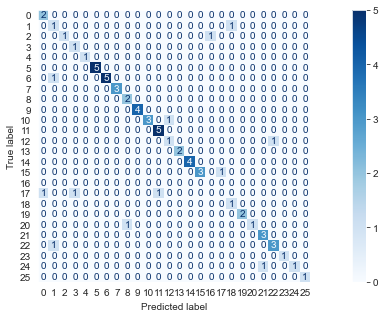

In [37]:
conf_mat = confusion_matrix(y_test,predictions)
m = ConfusionMatrixDisplay(conf_mat)
m.plot(cmap = "Blues")
plt.grid(b=None)

#### It is becoming very apparent that the scaled data performs much better than the unscaled data. The accuracy score is 22% better for scaled polynomial kernel than its counterpart at just 60%.

In [38]:
# Linear Kernel

In [39]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 10, 'kernel': 'linear'}
Best Estimators:
 SVC(C=10, kernel='linear')


In [40]:
predictions = grid.predict(X_test)
linear_scaled_score = accuracy_score(y_test, predictions)
print(linear_scaled_score)

0.7941176470588235


In [41]:
accuracies_unscaled = pd.Series(data=[linear_unscaled_score, poly_unscaled_score, radial_unscaled_score], 
                                index=['Linear', 'Polynomial', 'Radial'])
accuracies_unscaled

Linear        0.720588
Polynomial    0.602941
Radial        0.441176
dtype: float64

In [42]:
accuracies_scaled = pd.Series(data=[linear_scaled_score, poly_scaled_score, radial_scaled_score], 
                                index=['Linear', 'Polynomial', 'Radial'])
accuracies_scaled

Linear        0.794118
Polynomial    0.823529
Radial        0.764706
dtype: float64

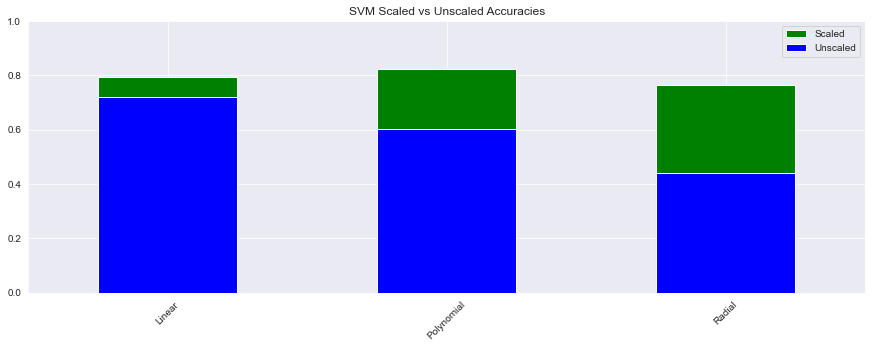

In [43]:
accuracies_scaled.plot(kind = 'bar', rot = 45, ylim = [0,1],color = 'Green')
accuracies_unscaled.plot(kind = 'bar', rot = 45, ylim = [0,1],color = 'Blue')
plt.legend(["Scaled", "Unscaled"])

plt.title('SVM Scaled vs Unscaled Accuracies')
plt.show()

#### I was predicting that the scaled linear kernel would perform the best given the trend I was observing. It is evident that scaled polynomial kernel yields the best accuracy score -- on the full dataset. 

## Finding best subset of features

It is obvious by now from the analysis that there are very correlated features in our dataset. To build the best model and reduce dimensionality, I will use different subsets and test those out and see if they produce higher accuracy scores when compared to the full dataset. I will be using the scaled version of the dataset since that produces the best SVM models.

In [44]:
# Dropping all highly correlated values such that highest correlation is less than .80

first_subset = df.drop(columns= ['Maximal Indentation Depth','Stochastic Convexity',
                        'Solidity','Average Intensity','Average Contrast',
                        'Smoothness','Third moment','Entropy'])
first_subset.head()

Class  Specimen Number  Eccentricity  Aspect Ratio  Elongation  \
0      1                1       0.72694        1.4742     0.32396   
1      1                2       0.74173        1.5257     0.36116   
2      1                3       0.76722        1.5725     0.38998   
3      1                4       0.73797        1.4597     0.35376   
4      1                5       0.82301        1.7707     0.44462   

   Isoperimetric Factor  Lobedness  Uniformity  
0               0.83592   0.003947    0.000275  
1               0.79867   0.005002    0.000075  
2               0.80812   0.010121    0.000038  
3               0.81697   0.008607    0.000066  
4               0.75493   0.010042    0.000024

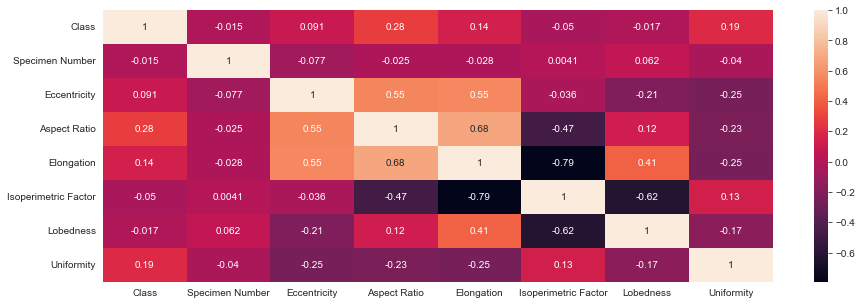

In [45]:
sns.heatmap(first_subset.corr(),annot=True)
plt.show()

In [46]:
x = first_subset.drop('Class', axis = 1)
y = first_subset['Class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [49]:
# First Subset Linear

In [50]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 100, 'kernel': 'linear'}
Best Estimators:
 SVC(C=100, kernel='linear')


In [51]:
predictions = grid.predict(X_test)
first_linear_score = accuracy_score(y_test, predictions)
print(first_linear_score)

0.5294117647058824


In [52]:
# First Subset Polynomial

In [53]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'degree': [1,2,3,4,5], 'kernel': ['poly']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'degree': 1, 'kernel': 'poly'}
Best Estimators:
 SVC(C=1000, degree=1, kernel='poly')


In [54]:
predictions = grid.predict(X_test)
first_poly_score = accuracy_score(y_test, predictions)
print(first_poly_score)

0.5294117647058824


In [55]:
# First Subset Radial

In [56]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=1000, gamma=0.01)


In [57]:
predictions = grid.predict(X_test)
first_radial_score = accuracy_score(y_test, predictions)
print(first_radial_score)

0.5147058823529411


In [58]:
first_subset_accuracies = pd.Series(data=[first_linear_score, first_poly_score, first_radial_score], 
                                index=['Linear', 'Polynomial', 'Radial'])
first_subset_accuracies

Linear        0.529412
Polynomial    0.529412
Radial        0.514706
dtype: float64

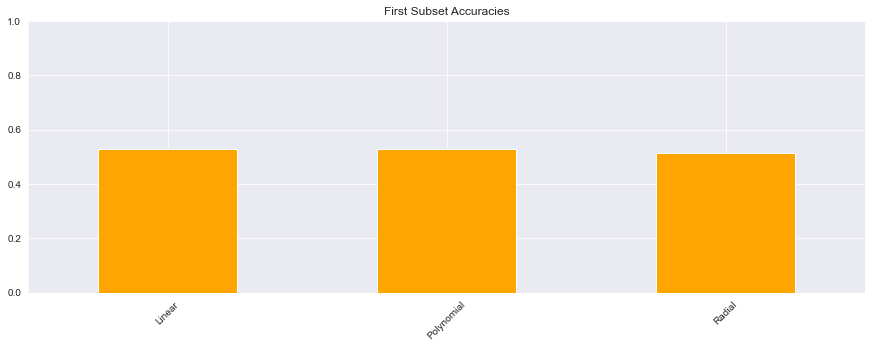

In [59]:
first_subset_accuracies.plot(kind = 'bar', rot = 45, ylim = [0,1],color = 'Orange')

plt.title('First Subset Accuracies')
plt.show()

In [60]:
# Second Subset: Removing all variables that are not very correlated to Class defined as less than .1

second_subset = df.drop(columns= ['Specimen Number','Eccentricity','Stochastic Convexity','Isoperimetric Factor',
                                 'Maximal Indentation Depth','Lobedness','Average Contrast','Smoothness','Third moment'
                                 ,'Entropy'])
second_subset.head()

Class  Aspect Ratio  Elongation  Solidity  Average Intensity  Uniformity
0      1        1.4742     0.32396   0.98535           0.047790    0.000275
1      1        1.5257     0.36116   0.98152           0.024160    0.000075
2      1        1.5725     0.38998   0.97755           0.011897    0.000038
3      1        1.4597     0.35376   0.97566           0.015950    0.000066
4      1        1.7707     0.44462   0.97698           0.007938    0.000024

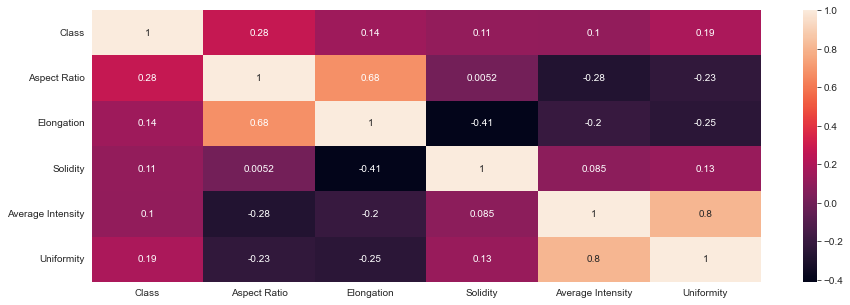

In [61]:
sns.heatmap(second_subset.corr(),annot=True)
plt.show()

In [62]:
x = second_subset.drop('Class', axis = 1)
y = second_subset['Class']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [64]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [65]:
# Second Subset Linear

In [66]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'kernel': 'linear'}
Best Estimators:
 SVC(C=1000, kernel='linear')


In [67]:
predictions = grid.predict(X_test)
second_linear_score = accuracy_score(y_test, predictions)
print(second_linear_score)

0.6029411764705882


In [68]:
# Second Subset Polynomial

In [69]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'degree': [1,2,3,4,5], 'kernel': ['poly']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 100, 'degree': 1, 'kernel': 'poly'}
Best Estimators:
 SVC(C=100, degree=1, kernel='poly')


In [70]:
predictions = grid.predict(X_test)
second_poly_score = accuracy_score(y_test, predictions)
print(second_poly_score)

0.6176470588235294


In [71]:
# Second Subset Radial

In [72]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=1000, gamma=0.01)


In [73]:
predictions = grid.predict(X_test)
second_radial_score = accuracy_score(y_test, predictions)
print(second_radial_score)

0.6176470588235294


In [74]:
second_subset_accuracies = pd.Series(data=[second_linear_score, second_poly_score, second_radial_score], 
                                index=['Linear', 'Polynomial', 'Radial'])
second_subset_accuracies

Linear        0.602941
Polynomial    0.617647
Radial        0.617647
dtype: float64

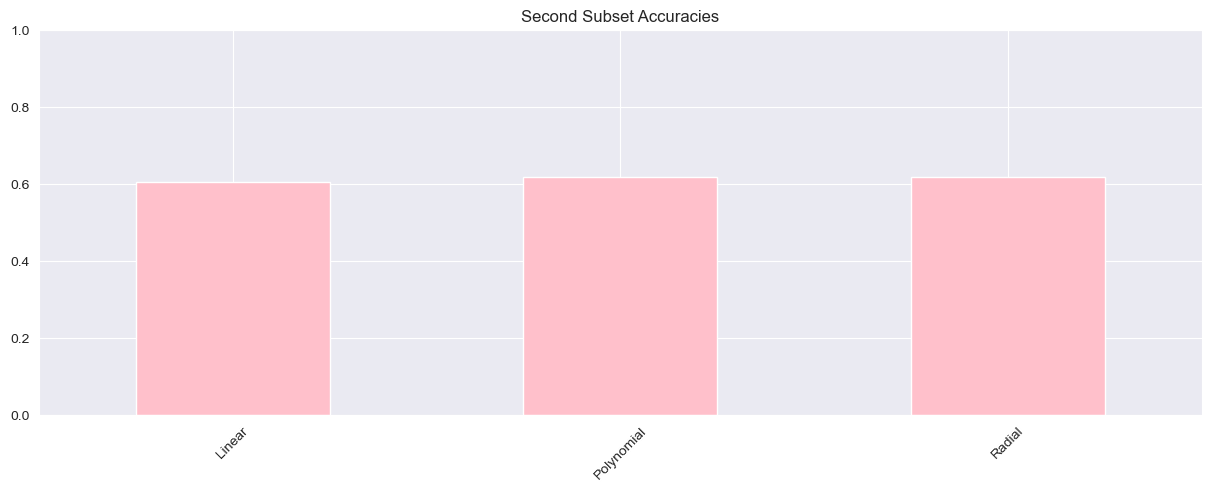

In [75]:
second_subset_accuracies.plot(kind = 'bar', rot = 45, ylim = [0,1],color = 'Pink')

plt.title('Second Subset Accuracies')
plt.show()

#### Unfortunately after testing out different subsets manually, they all produce lower test results. I think this has to do with the fact that we have 36 different classifications and more is better in determining the nuances between species of leaves. 

## PCA 

In [76]:
X_PCA = df.drop('Class', axis = 1)
y_PCA = df['Class']

In [77]:
# First we need to scale the data
scaler = StandardScaler()

X_PCA_scaled = scaler.fit_transform(X_PCA)
X_PCA_df = pd.DataFrame(X_PCA_scaled)


In [78]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_PCA_df,y_PCA)

In [79]:
pca.explained_variance_ratio_

array([0.37889539, 0.27979699, 0.14071964])

In [80]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2, color=y_PCA,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [81]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    title="How much PCs explain Variance",
    labels={"x": "# Components", "y": "Explained Variance"}
)

## PCA on SVM

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_PCA, test_size= 0.2, random_state=0)

In [83]:
# Linear Kernel

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [85]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 10, 'kernel': 'linear'}
Best Estimators:
 SVC(C=10, kernel='linear')


In [86]:
predictions = grid.predict(X_test)
PCA_linear_score = accuracy_score(y_test, predictions)
print(PCA_linear_score)

0.5588235294117647


In [87]:
# Polynomial Kernel

In [88]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'degree': [1,2,3,4,5], 'kernel': ['poly']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 10, 'degree': 1, 'kernel': 'poly'}
Best Estimators:
 SVC(C=10, degree=1, kernel='poly')


In [89]:
predictions = grid.predict(X_test)
PCA_poly_score = accuracy_score(y_test, predictions)
print(PCA_poly_score)

0.47058823529411764


In [90]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=1000, gamma=0.001)


In [91]:
predictions = grid.predict(X_test)
PCA_radial_score = accuracy_score(y_test, predictions)
print(PCA_radial_score)

0.5147058823529411


In [92]:
PCA_SVM_accuracies = pd.Series(data=[PCA_linear_score, PCA_poly_score, PCA_radial_score], 
                                index=['Linear', 'Polynomial', 'Radial'])
PCA_SVM_accuracies

Linear        0.558824
Polynomial    0.470588
Radial        0.514706
dtype: float64

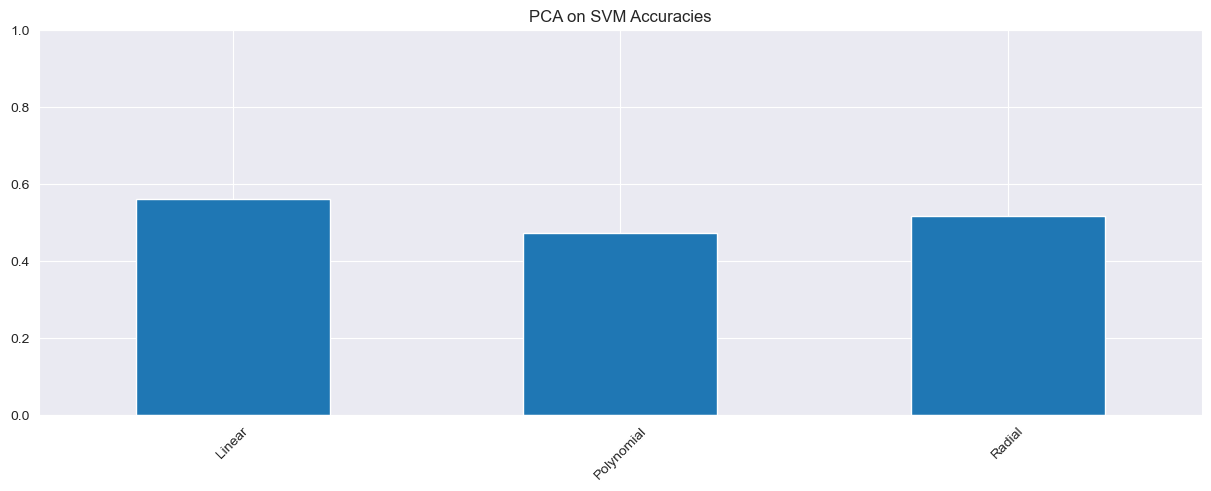

In [93]:
PCA_SVM_accuracies.plot(kind = 'bar', rot = 45, ylim = [0,1])

plt.title('PCA on SVM Accuracies')
plt.show()

# Logistic Regression

For the Logistic Regression model, we will first train our model on the unscaled data, then on the scaled data to see which performs better. From there, we will try multiple subsets of the features to get the highest accuracy for the model. 

In [94]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

## Logistic Regression with unscaled data

In [96]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [97]:
# model evaluation
predictions_lg_unscaled = logmodel.predict(X_test)

In [98]:
print(classification_report(y_test,predictions_lg_unscaled))
print(confusion_matrix(y_test,predictions_lg_unscaled))
print('Accuracy for Logistic Regression, unscaled data: \n',accuracy_score(y_test, predictions_lg_unscaled))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.20      0.50      0.29         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           8       1.00      1.00      1.00         3
           9       0.25      0.50      0.33         2
          10       0.67      0.50      0.57         4
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         4
          13       0.50      0.40      0.44         5
          14       0.00      0.00      0.00         2
          15       1.00      0.50      0.67         2
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         0
          24       0.00    

#### We can see that with unscaled data, the Logistic Regression model does not perform good, with an accuracy score of 26.47%.

## Logistic Regression with scaled data

Now, I'll scale the data and train the Logistic Regression model on it. 

In [99]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [100]:
logmodel.fit(X_train,y_train)
predictions_lg_scaled = logmodel.predict(X_test)

In [101]:
print(classification_report(y_test,predictions_lg_scaled))
print(confusion_matrix(y_test,predictions_lg_scaled))
print('Accuracy for Logistic Regression, scaled data: \n',accuracy_score(y_test, predictions_lg_scaled))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.50      0.50      0.50         2
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      0.60      0.75         5
           7       1.00      0.50      0.67         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         4
          12       0.75      0.75      0.75         4
          13       0.60      0.60      0.60         5
          14       0.50      0.50      0.50         2
          15       1.00      1.00      1.00         2
          22       1.00      1.00      1.00         4
          23       0.00      0.00      0.00         0
          24       0.75      0.75      0.75         4
          25       0.00    

#### With simply scaling the dataset, we were able to more than double our accuracy, going from 26.47% to 66.18%. 

With this information, we will attempt to get a higher accuracy by training the model on **scaled** subsets, as we know that scaled data worked a lot better. We will use the subsets created for SVM.

## Logistic Regression on scaled subsets

As previously mentioned when creating the subsets, the subsets are as follows: 

- `first_subset`: Highly correlated features **excluded**
- `second_subset`: Keeping **only** highly correlated features

In [102]:
x = first_subset.drop('Class', axis = 1)
y = first_subset['Class']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [104]:
logmodel.fit(X_train,y_train)
predictions_lg_first_subset = logmodel.predict(X_test)

In [105]:
print(classification_report(y_test,predictions_lg_first_subset))
print(confusion_matrix(y_test,predictions_lg_first_subset))
print('Accuracy for Logistic Regression, first subset: \n',accuracy_score(y_test, predictions_lg_first_subset))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.25      0.50      0.33         2
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           8       1.00      1.00      1.00         3
           9       0.50      1.00      0.67         2
          10       1.00      0.25      0.40         4
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         4
          13       0.75      0.60      0.67         5
          14       0.00      0.00      0.00         2
          15       1.00      1.00      1.00         2
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         0
          24       0.00    

#### We can see that excluding highly correlated features made the accuracy go down almost as low as using the entire unscaled data. The accuracy is 33.82%

Now, we will see what that accuracy becomes when using the scaled second subset. 

In [106]:
x = second_subset.drop('Class', axis = 1)
y = second_subset['Class']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [108]:
logmodel.fit(X_train,y_train)
predictions_lg_second_subset = logmodel.predict(X_test)

In [109]:
print(classification_report(y_test,predictions_lg_second_subset))
print(confusion_matrix(y_test,predictions_lg_second_subset))
print('Accuracy for Logistic Regression, second subset: \n',accuracy_score(y_test, predictions_lg_second_subset))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.50      0.50      0.50         2
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.20      1.00      0.33         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           8       1.00      1.00      1.00         3
           9       1.00      0.50      0.67         2
          10       0.50      0.25      0.33         4
          11       0.00      0.00      0.00         0
          12       0.50      0.25      0.33         4
          13       1.00      0.40      0.57         5
          14       0.20      0.50      0.29         2
          15       1.00      1.00      1.00         2
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         0
          24       0.40    

#### Using the second subset, while better than the first subset, overall only gave an accuracy of 42.64%. 

So far, the best Logistic Regression model has been using the entire scaled data, with an accuracy of 66.18%. 

The last thing to try with the Logitic Regression model is using PCA.

## Logistic Regression with PCA

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_PCA, test_size= 0.2, random_state=0)

In [111]:
logmodel.fit(X_train,y_train)
predictions_lg_pca = logmodel.predict(X_test)

In [112]:
print(classification_report(y_test,predictions_lg_pca))
print(confusion_matrix(y_test,predictions_lg_pca))
print('Accuracy for Logistic Regression, PCA: \n',accuracy_score(y_test, predictions_lg_pca))

              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.20      1.00      0.33         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           8       1.00      1.00      1.00         3
           9       0.50      0.50      0.50         2
          10       1.00      0.75      0.86         4
          11       0.00      0.00      0.00         0
          12       0.67      0.50      0.57         4
          13       1.00      0.40      0.57         5
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         2
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         0
          24       0.50    

#### With PCA, the accuracy did not improve much, at 44.11%

In order to figure out the best model, I will visualize the accuracy scores. 

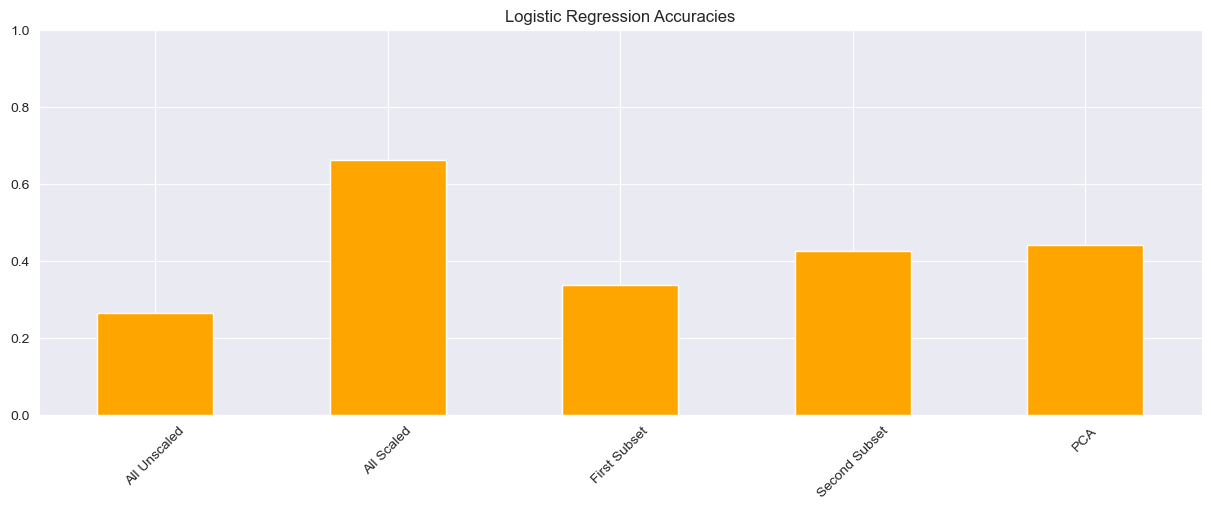

In [113]:
accuracies_lg = [accuracy_score(y_test, predictions_lg_unscaled),accuracy_score(y_test, predictions_lg_scaled), accuracy_score(y_test, predictions_lg_first_subset), accuracy_score(y_test, predictions_lg_second_subset), accuracy_score(y_test, predictions_lg_pca)]
accuracies_lg = pd.Series(data=accuracies_lg, index=['All Unscaled', 'All Scaled', 'First Subset', 'Second Subset', 'PCA'])
accuracies_lg.plot(kind='bar', rot= 45, ylim=[0,1], color = 'Orange')
plt.title('Logistic Regression Accuracies')
plt.show()


With this analysis, we can conclude that for Logistic Regression, the best model was the one trained with the **scaled** entire data, with an accuracy of 66.18%

# Random Forest

Similarly to what was done to the Logistic Regression models, the random forest model will first be trained on the full unscaled dataset, then the scaled, and then multiple subsets as well as PCA. 


In [114]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

## Random Forest with unscaled data

In [116]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state= 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [117]:
predictions_rfc_unscaled = rfc.predict(X_test)

In [118]:
print(classification_report(y_test,predictions_rfc_unscaled))
print(confusion_matrix(y_test,predictions_rfc_unscaled))
print('Accuracy for Random Forest, unscaled data: \n',accuracy_score(y_test, predictions_rfc_unscaled))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         2
           4       0.33      1.00      0.50         1
           5       0.33      1.00      0.50         1
           6       1.00      0.40      0.57         5
           7       0.67      0.33      0.44         6
           8       1.00      1.00      1.00         3
           9       0.40      1.00      0.57         2
          10       1.00      1.00      1.00         4
          11       0.00      0.00      0.00         0
          12       0.75      0.75      0.75         4
          13       1.00      1.00      1.00         5
          14       1.00      0.50      0.67         2
          15       0.67      1.00      0.80         2
          22       0.67      0.50      0.57         4
          24       1.00      0.25      0.40         4
          26       0.67    

#### We can see that Random Forest begun with a good accuracy score on the unscaled data when comparing it to the Logistic Regression models, with an accuracy of 66.17%.

## Random Forest with scaled data

In [119]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [120]:
rfc.fit(X_train, y_train)
predictions_rfc_scaled = rfc.predict(X_test)

In [121]:
print(classification_report(y_test,predictions_rfc_scaled))
print(confusion_matrix(y_test,predictions_rfc_scaled))
print('Accuracy for Random Forest, scaled data: \n',accuracy_score(y_test, predictions_rfc_scaled))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         2
           4       0.33      1.00      0.50         1
           5       0.33      1.00      0.50         1
           6       1.00      0.40      0.57         5
           7       0.67      0.33      0.44         6
           8       1.00      1.00      1.00         3
           9       0.40      1.00      0.57         2
          10       1.00      1.00      1.00         4
          11       0.00      0.00      0.00         0
          12       0.75      0.75      0.75         4
          13       1.00      1.00      1.00         5
          14       1.00      0.50      0.67         2
          15       0.67      1.00      0.80         2
          22       0.67      0.50      0.57         4
          24       1.00      0.25      0.40         4
          26       0.67    

#### Unlike what occurred with the Logistic Regression model, the using scaled vs unscaled did not change the accuracy of the Random Forest model, staying at 66.17%

With this being the case, we will once again try using subsets of the data for training, but this time we will do so on both scaled and unscaled subsets, to try and get the highest accuracy possible.

## Random Forest on unscaled subsets

In [122]:
x = first_subset.drop('Class', axis = 1)
y = first_subset['Class']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [124]:
rfc.fit(X_train, y_train)
predictions_rfc_first_unscaled = rfc.predict(X_test)

In [125]:
print(classification_report(y_test,predictions_rfc_first_unscaled))
print(confusion_matrix(y_test,predictions_rfc_first_unscaled))
print('Accuracy for Random Forest, first subset unscaled: \n',accuracy_score(y_test, predictions_rfc_first_unscaled))

              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      0.40      0.57         5
           7       1.00      0.50      0.67         6
           8       0.75      1.00      0.86         3
           9       0.40      1.00      0.57         2
          10       1.00      0.75      0.86         4
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         4
          13       1.00      0.40      0.57         5
          14       1.00      0.50      0.67         2
          15       0.67      1.00      0.80         2
          22       0.00      0.00      0.00         4
          24       1.00      0.50      0.67         4
          25       0.00    

#### Using the first subset, the accuracy dropped to it's lowest so far for Random Forest models, at 51.47%. This subset was the one using only non-correlated features.

We will now see what happens when using **only correlated** features, unscaled. 

In [126]:
x = second_subset.drop('Class', axis = 1)
y = second_subset['Class']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [128]:
rfc.fit(X_train, y_train)
predictions_rfc_second_unscaled = rfc.predict(X_test)

In [129]:
print(classification_report(y_test,predictions_rfc_second_unscaled))
print(confusion_matrix(y_test,predictions_rfc_second_unscaled))
print('Accuracy for Random Forest, second subset unscaled: \n',accuracy_score(y_test, predictions_rfc_second_unscaled))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.50      0.50      0.50         2
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           6       1.00      0.60      0.75         5
           7       0.75      0.50      0.60         6
           8       1.00      1.00      1.00         3
           9       0.50      1.00      0.67         2
          10       0.50      0.50      0.50         4
          12       0.00      0.00      0.00         4
          13       0.67      0.80      0.73         5
          14       1.00      0.50      0.67         2
          15       0.67      1.00      0.80         2
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         4
          25       0.00    

#### The accuracy was the same for the second subset, at 51.47% 

We will now see if scaling will provide different results. 

## Random Forest on scaled subsets

In [130]:
x = first_subset.drop('Class', axis = 1)
y = first_subset['Class']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [132]:
rfc.fit(X_train, y_train)
predictions_rfc_first_scaled = rfc.predict(X_test)

In [133]:
print(classification_report(y_test,predictions_rfc_first_scaled))
print(confusion_matrix(y_test,predictions_rfc_first_scaled))
print('Accuracy for Random Forest, first subset scaled: \n',accuracy_score(y_test, predictions_rfc_first_scaled))

              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      0.20      0.33         5
           7       1.00      0.50      0.67         6
           8       0.75      1.00      0.86         3
           9       0.40      1.00      0.57         2
          10       1.00      0.75      0.86         4
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         4
          13       1.00      0.40      0.57         5
          14       1.00      0.50      0.67         2
          15       0.67      1.00      0.80         2
          22       0.00      0.00      0.00         4
          24       1.00      0.50      0.67         4
          25       0.00    

#### In the case for the first subset, scaling the dataset led to an even lower accuracy score of 50%. 

Now for the second subset, scaled: 

In [134]:
x = second_subset.drop('Class', axis = 1)
y = second_subset['Class']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [136]:
rfc.fit(X_train, y_train)
predictions_rfc_second_scaled = rfc.predict(X_test)

In [137]:
print(classification_report(y_test,predictions_rfc_second_scaled))
print(confusion_matrix(y_test,predictions_rfc_second_scaled))
print('Accuracy for Random Forest, second subset scaled: \n',accuracy_score(y_test, predictions_rfc_second_scaled))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.50      0.50      0.50         2
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           6       1.00      0.60      0.75         5
           7       0.75      0.50      0.60         6
           8       1.00      1.00      1.00         3
           9       0.50      1.00      0.67         2
          10       0.50      0.50      0.50         4
          12       0.00      0.00      0.00         4
          13       0.67      0.80      0.73         5
          14       1.00      0.50      0.67         2
          15       0.67      1.00      0.80         2
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         4
          25       0.00    

#### For the second subset, the accuracy stayed the exact same, at 51.47%

With this information, we can conclude that so far, the best model is created by the scaled, entire dataset, with an accuracy of 64.7%. 

## Random Forest with PCA

We will try to use PCA to get a higher accuracy for our Random Forest model. 

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_PCA, test_size= 0.2, random_state=0)

In [139]:
rfc.fit(X_train, y_train)
predictions_rfc_pca = rfc.predict(X_test)

In [140]:
print(classification_report(y_test,predictions_rfc_pca))
print(confusion_matrix(y_test,predictions_rfc_pca))
print('Accuracy for Random Forest, PCA: \n',accuracy_score(y_test, predictions_rfc_pca))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.33      0.50      0.40         2
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1
           6       0.67      0.40      0.50         5
           7       0.50      0.17      0.25         6
           8       1.00      1.00      1.00         3
           9       0.50      0.50      0.50         2
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         0
          12       0.50      0.25      0.33         4
          13       0.75      0.60      0.67         5
          14       0.50      0.50      0.50         2
          15       1.00      1.00      1.00         2
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         0
          24       0.50    

#### The model created with PCA had the lowest accuracy of all the Random Forest models, at 45.59%

Since we know so far that the best model was created using the scaled/unscaled entire dataset, I will use different parameters for the Random Forest to try and get a higher accuracy. 

## Random Forest with Entropy Criterion

In [141]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [143]:
rfc_entropy = RandomForestClassifier(n_estimators=100, random_state= 0, criterion='entropy')
rfc_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [144]:
predictions_rfc_entropy = rfc_entropy.predict(X_test)

In [145]:
print(classification_report(y_test,predictions_rfc_entropy))
print(confusion_matrix(y_test,predictions_rfc_entropy))
print('Accuracy for Random Forest, unscaled data, entropy criterion: \n',accuracy_score(y_test, predictions_rfc_entropy))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           6       1.00      0.60      0.75         5
           7       1.00      0.17      0.29         6
           8       0.75      1.00      0.86         3
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         4
          11       0.00      0.00      0.00         0
          12       0.75      0.75      0.75         4
          13       0.83      1.00      0.91         5
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         2
          22       0.50      0.25      0.33         4
          23       0.00      0.00      0.00         0
          24       0.50    

#### Using the entropy criterion dropped accuracy down to 60.29%. 

With this analysis, our best Random Forest model was created by using the entire unscaled data. Scaling the data did not have an effect on the model. The accuracy for it was 66.17%. 

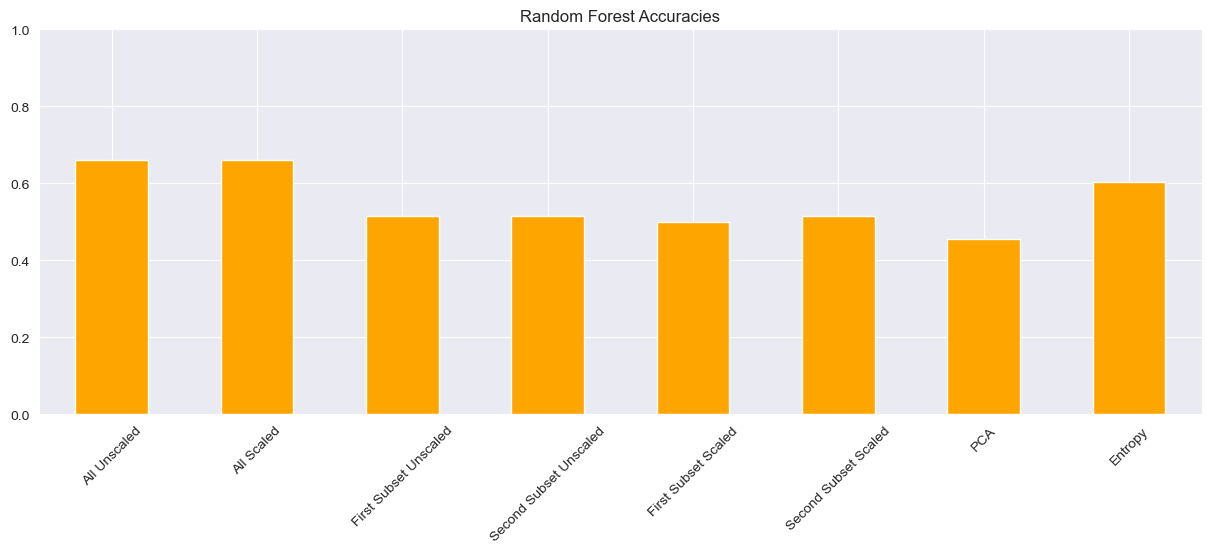

In [146]:
accuracies_rf = [accuracy_score(y_test, predictions_rfc_unscaled),accuracy_score(y_test, predictions_rfc_scaled), accuracy_score(y_test, predictions_rfc_first_unscaled), accuracy_score(y_test, predictions_rfc_second_unscaled), accuracy_score(y_test, predictions_rfc_first_scaled), accuracy_score(y_test, predictions_rfc_second_scaled), accuracy_score(y_test, predictions_rfc_pca), accuracy_score(y_test, predictions_rfc_entropy)]
accuracies_rf = pd.Series(data=accuracies_rf, index=['All Unscaled', 'All Scaled', 'First Subset Unscaled', 'Second Subset Unscaled', 'First Subset Scaled', 'Second Subset Scaled', 'PCA', 'Entropy'])
accuracies_rf.plot(kind='bar', rot= 45, ylim=[0,1], color = 'Orange')
plt.title('Random Forest Accuracies')
plt.show()

#### We can see that most of the accuracies for Random Forest remained at a similar range. Overall, the highest accuracy was for the entire dataset, whether scaled or unscaled, at 66.17%. 

## KNN
For the KNN model, we will first train our model on the unscaled data, then on the scaled data to see which performs better. From there, we will find the best hyperparameters and features to get the highest accuracy of the model.

In [147]:
df = pd.read_csv('leaf.csv',
                names = ['Class','Specimen Number','Eccentricity','Aspect Ratio','Elongation','Solidity','Stochastic Convexity',
                        'Isoperimetric Factor','Maximal Indentation Depth','Lobedness','Average Intensity','Average Contrast',
                        'Smoothness','Third moment','Uniformity','Entropy'])

In [148]:
df = df.drop('Specimen Number', axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Unscaled Data for KNN model

Accuracy of KNN model with unscaled data: 0.5294117647058824
Confusion matrix of KNN model with unscaled data:
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 

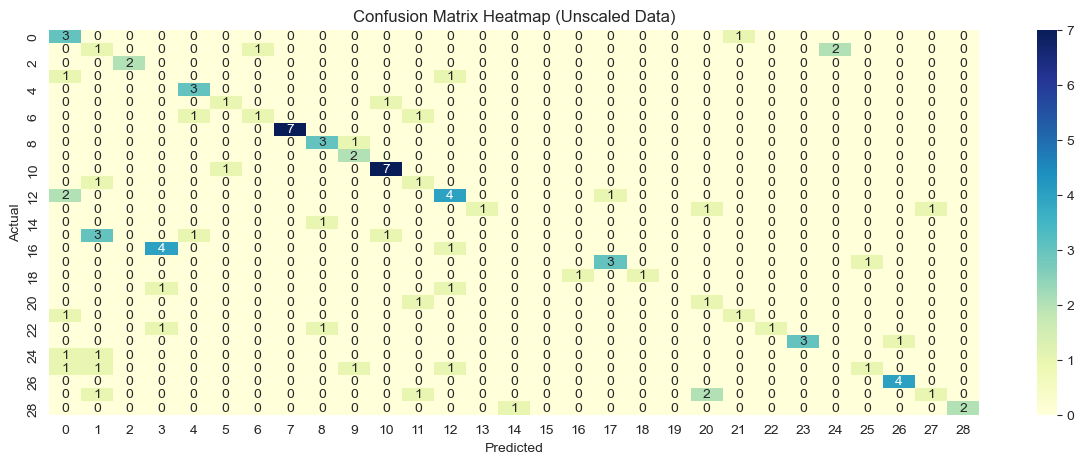

Classification report of KNN model with unscaled data:
               precision    recall  f1-score   support

           1       0.33      0.75      0.46         4
           2       0.12      0.25      0.17         4
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         2
           5       0.60      1.00      0.75         3
           6       0.50      0.50      0.50         2
           7       0.50      0.33      0.40         3
           8       1.00      1.00      1.00         7
           9       0.60      0.75      0.67         4
          10       0.50      1.00      0.67         2
          11       0.78      0.88      0.82         8
          12       0.25      0.50      0.33         2
          13       0.50      0.57      0.53         7
          14       1.00      0.33      0.50         3
          15       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         5
          24       0.00  

In [150]:
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)

y_pred_unscaled = knn_unscaled.predict(X_test)

accuracy_knn_unscaled = accuracy_score(y_test, y_pred_unscaled)
print("Accuracy of KNN model with unscaled data:", accuracy_knn_unscaled)

cm_knn_unscaled = confusion_matrix(y_test, y_pred_unscaled)
print("Confusion matrix of KNN model with unscaled data:\n", cm_knn_unscaled)

sns.heatmap(cm_knn_unscaled, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Unscaled Data)')
plt.show()

report_knn_unscaled = classification_report(y_test, y_pred_unscaled, zero_division=0)
print("Classification report of KNN model with unscaled data:\n", report_knn_unscaled)


#### Here we can see that the unscaled data had an accuracy of 53%.

## Scaled Data for KNN

In [151]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy of KNN model: 0.6274509803921569
Confusion matrix of KNN model:
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

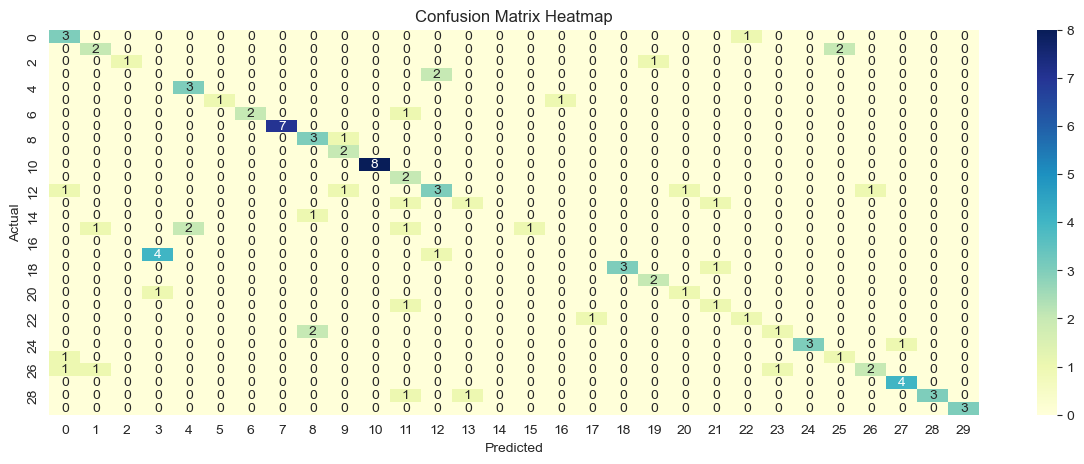

Classification report of KNN model:
               precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       0.50      0.50      0.50         4
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         2
           5       0.60      1.00      0.75         3
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         7
           9       0.50      0.75      0.60         4
          10       0.50      1.00      0.67         2
          11       1.00      1.00      1.00         8
          12       0.29      1.00      0.44         2
          13       0.50      0.43      0.46         7
          14       0.50      0.33      0.40         3
          15       0.00      0.00      0.00         1
          22       1.00      0.20      0.33         5
          23       0.00      0.00      0.00 

In [153]:
y_pred = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy of KNN model:", accuracy_knn)

cm_knn = confusion_matrix(y_test, y_pred)
print("Confusion matrix of KNN model:\n", cm_knn)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

report_knn = classification_report(y_test, y_pred, zero_division=0)
print("Classification report of KNN model:\n", report_knn)

#### Here we can already see that the model performed better than the unscaled version with an increase of 10% in accuracy.

## Find the best hyperparameters

In [154]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=8)

best_model = clf.fit(X,y)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


#### Here we used GridSearchCV to test out an array of values to find the best hyperparameters. In this case, we got leaf size = 1. p = 1, and n neighbors = 3.

## Calculate accuracy with new hyperparameters.

Accuracy of KNN model with best hyperparameters: 0.6176470588235294
Confusion matrix of KNN model with best hyperparameters:
 [[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0

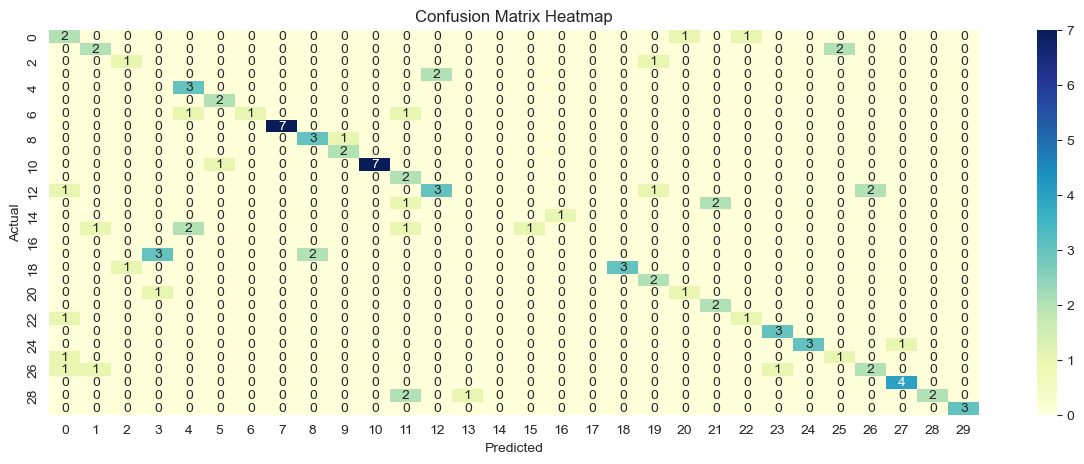

Classification report of KNN model with best hyperparameters:
               precision    recall  f1-score   support

           1       0.33      0.50      0.40         4
           2       0.50      0.50      0.50         4
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         2
           5       0.50      1.00      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      0.33      0.50         3
           8       1.00      1.00      1.00         7
           9       0.60      0.75      0.67         4
          10       0.67      1.00      0.80         2
          11       1.00      0.88      0.93         8
          12       0.29      1.00      0.44         2
          13       0.60      0.43      0.50         7
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          22       1.00      0.20      0.33         5
          23      

In [158]:
# Using the best hyperparameters we got
best_leaf_size = best_model.best_estimator_.get_params()['leaf_size']
best_p = best_model.best_estimator_.get_params()['p']
best_n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']

# Creating a new KNN model with the hyperparameters
best_knn = KNeighborsClassifier(leaf_size=best_leaf_size, n_neighbors=best_n_neighbors, p=best_p)

best_knn.fit(X_train_scaled, y_train)

y_pred_best = best_knn.predict(X_test_scaled)

accuracy_best_knn = accuracy_score(y_test, y_pred_best)
print("Accuracy of KNN model with best hyperparameters:", accuracy_best_knn)

cm_best_knn = confusion_matrix(y_test, y_pred_best)
print("Confusion matrix of KNN model with best hyperparameters:\n", cm_best_knn)

sns.heatmap(cm_best_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

report_best_knn = classification_report(y_test, y_pred_best, zero_division=0)
print("Classification report of KNN model with best hyperparameters:\n", report_best_knn)

#### Here we can see that the parameters didn't affect the model much, in fact, it went down by around 1% accuracy in the model.

## Calculate accuracy with best hyperparameters and features.

Accuracy of KNN model with best hyperparameters and selected features: 0.6372549019607843
Confusion matrix of KNN model with best hyperparameters:
 [[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0

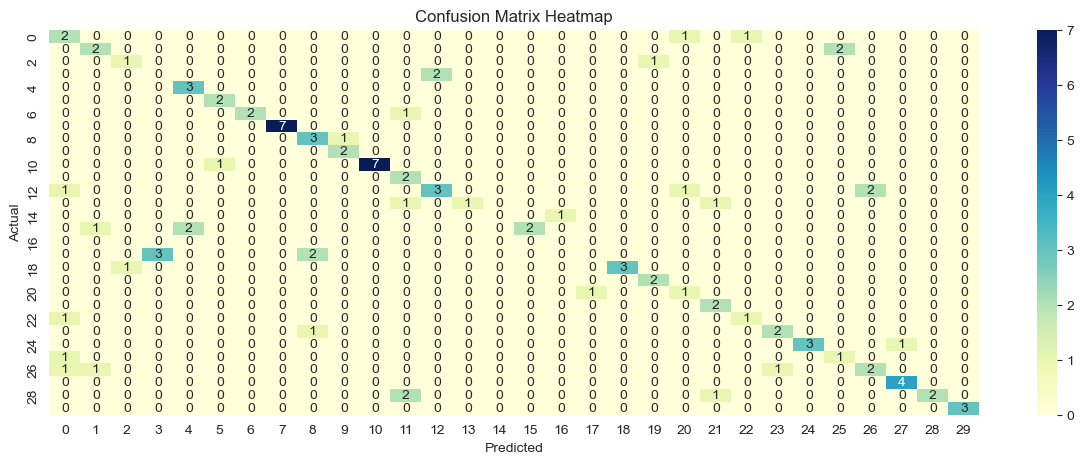

Classification report of KNN model with best hyperparameters and selected features:
               precision    recall  f1-score   support

           1       0.33      0.50      0.40         4
           2       0.50      0.50      0.50         4
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         2
           5       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         7
           9       0.50      0.75      0.60         4
          10       0.67      1.00      0.80         2
          11       1.00      0.88      0.93         8
          12       0.33      1.00      0.50         2
          13       0.60      0.43      0.50         7
          14       1.00      0.33      0.50         3
          15       0.00      0.00      0.00         1
          22       1.00      0.40      0.57       

In [156]:
# Using Logistic Regression as the estimator for feature ranking
estimator = LogisticRegression()

selector = RFECV(estimator, step=1, cv=4)

selector = selector.fit(X_train_scaled, y_train)

X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

best_knn_selected = KNeighborsClassifier(leaf_size=best_leaf_size, n_neighbors=best_n_neighbors, p=best_p)
best_knn_selected.fit(X_train_selected, y_train)

y_pred_selected = best_knn_selected.predict(X_test_selected)

accuracy_best_knn_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy of KNN model with best hyperparameters and selected features:", accuracy_best_knn_selected)

cm_better_knn = confusion_matrix(y_test, y_pred_selected)
print("Confusion matrix of KNN model with best hyperparameters:\n", cm_better_knn)

sns.heatmap(cm_better_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

report_better_knn = classification_report(y_test, y_pred_selected, zero_division=0)
print("Classification report of KNN model with best hyperparameters and selected features:\n", report_better_knn)


#### After changing the features we are using, we can see that the accuracy is still only changed by 1%.

## KNN with PCA

Accuracy of KNN model with best hyperparameters, selected features, and PCA: 0.6470588235294118
Confusion matrix of KNN model with best hyperparameters, selected features, and PCA:
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]

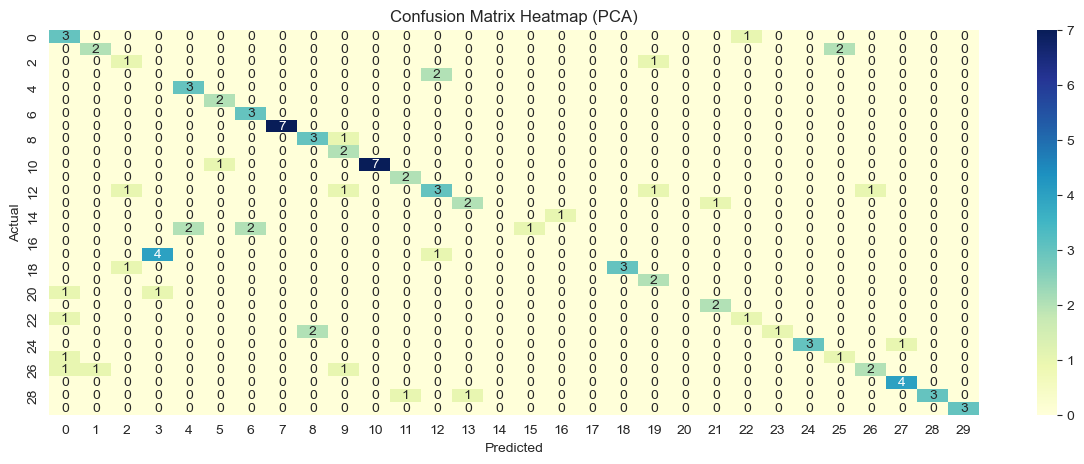

Classification report of KNN model with best hyperparameters, selected features, and PCA:
               precision    recall  f1-score   support

           1       0.43      0.75      0.55         4
           2       0.67      0.50      0.57         4
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         2
           5       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       0.60      1.00      0.75         3
           8       1.00      1.00      1.00         7
           9       0.60      0.75      0.67         4
          10       0.40      1.00      0.57         2
          11       1.00      0.88      0.93         8
          12       0.67      1.00      0.80         2
          13       0.50      0.43      0.46         7
          14       0.67      0.67      0.67         3
          15       0.00      0.00      0.00         1
          22       1.00      0.20      0.33 

In [159]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

best_knn_pca = KNeighborsClassifier(leaf_size=best_leaf_size, n_neighbors=best_n_neighbors, p=best_p)
best_knn_pca.fit(X_train_pca, y_train)

y_pred_pca = best_knn_pca.predict(X_test_pca)

accuracy_best_knn_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy of KNN model with best hyperparameters, selected features, and PCA:", accuracy_best_knn_pca)

cm_best_knn_pca = confusion_matrix(y_test, y_pred_pca)
print("Confusion matrix of KNN model with best hyperparameters, selected features, and PCA:\n", cm_best_knn_pca)

sns.heatmap(cm_best_knn_pca, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (PCA)')
plt.show()

report_best_knn_pca = classification_report(y_test, y_pred_pca, zero_division=0)
print("Classification report of KNN model with best hyperparameters, selected features, and PCA:\n", report_best_knn_pca)


After using PCA on the model, we can see that it wasn't as effective as expected and only raised the accuracy by 1% as well.

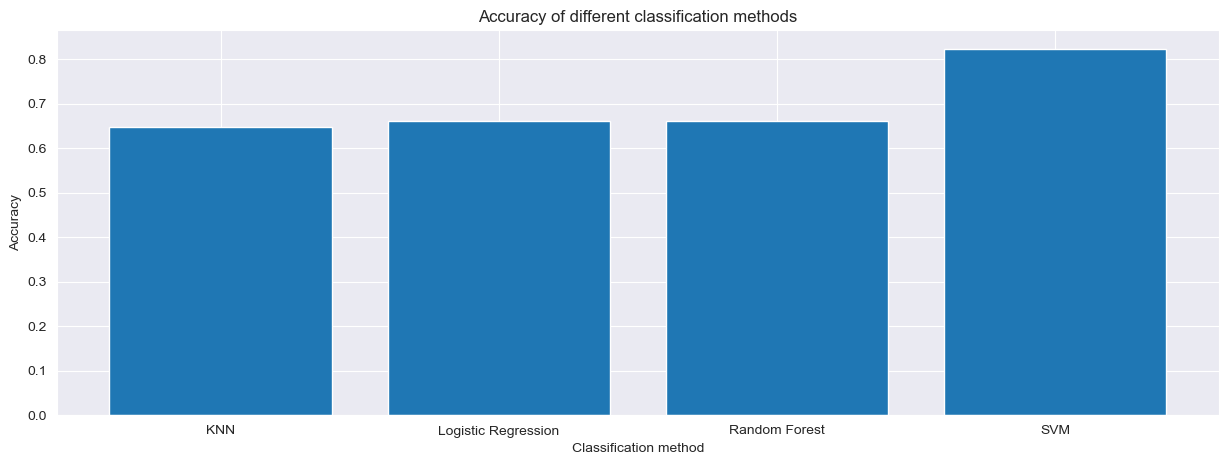

In [161]:
logistic_regression_accuracy = accuracies_lg[1]
random_forest_accuracy = accuracies_rf[1]
svm_accuracy = poly_scaled_score

accuracy_scores = [accuracy_best_knn_pca, logistic_regression_accuracy, random_forest_accuracy, svm_accuracy]
labels = ['KNN', 'Logistic Regression', 'Random Forest', 'SVM']

plt.bar(labels, accuracy_scores)
plt.title("Accuracy of different classification methods")
plt.xlabel("Classification method")
plt.ylabel("Accuracy")
plt.show()

## Contributions

#### Data Analysis/Preprocessing/SVM - Alexander Hernandez 

#### Logistic Regression/Random Forest - Giselle Ruiz 

#### KNN/Conclusion/Results/Discussion - Christopher Turcios

## Results/Discussion

#### Problems with dataset and why this lead to poor model performances:

* When we take a look at our dataset, we see that a lot of leaf species are very similar except for a few outliers. 
* The dataset only has 340 observations with 16 attributes. (High Dimensionality and few observations) 
* The dataset only has around 10-12 observations per Class of leaf species, thus when you split the dataset into training and test you get very few observations, per class, that the models can train on. 
* The dataset includes a lot of highly correlated features which are just transformations of some measurements, so this increases redundancy. 
* This leads into probably the most important point: pretty much all features are not very correlated to the Class. This makes drawing distinctions between classes incredibly difficult.
* Because there are 36 Classes, creating useful graphs that might show distinction between species proved to be difficult. A more useful use of the dataset would be to drop those species that are hard to distinguish.


#### Why were accuracies falling despite our best efforts to improve them?
* PCA is very useful when we have high dimensionality like we have in this dataset and when we have multicollinearity, but because there were too many of those highly correlated features and they didn’t correlate well with the class, this resulted in greater loss of information when we took only the 3 principal components. As was shown, these 3 PCs explained around 80% of the explained variance.
* For the feature selection portion, particularly in the SVM part, as soon as it was evident that there was a significant loss when multiple features were dropped, I dropped only one highly correlated feature and the accuracy dropped every time. 

#### Why was PCA in particular, not as useful as we initially thought? 
* PCA is a linear model, but the relationships between variables may not have the form of a linear combination.

#### Why was SVM performing the best?
* Because SVM is known for performing better in higher dimensional spaces. Especially when SVM can transform data using kernels and can make use of the cost function to intentionally have some misclassifications in order to generalize the model better.



## Conclusion
In conclusion, we have analyzed the performance of four different classification models: KNN, Logistic Regression, Random Forest, and SVM. We have employed hyperparameter tuning, feature selection, and Principal Component Analysis (PCA) to optimize the performance of these models.

The KNN model achieved the highest accuracy of 65% when using the best hyperparameters and selected features, while Logistic Regression and Random Forest models both reached their best accuracy of 66% when using all the scaled data. However, the SVM model outperformed all others with the best accuracy of 82% when using a polynomial kernel.

Based on these results, the SVM model with a polynomial kernel appears to be the most suitable choice for this classification task, given its significantly higher accuracy compared to the other models.